# **STEP 1:**

clean the data, delete the colum that is not in data description

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/cleaned_airbnb_Chicago.csv'
df = pd.read_csv(file_path)

# List of columns from the data description
valid_columns = [
    'Airbnb Host ID', 'Airbnb Property ID', 'City_x', 'superhost_period_all', 'Scraped Date',
    'host_is_superhost_in_period', 'prev_host_is_superhost_in_period', 'Superhost',
    'prev_host_is_superhost', 'superhost_change', 'superhost_change_lose_superhost',
    'superhost_change_gain_superhost', 'rating_ave_pastYear', 'numReviews_pastYear',
    'numCancel_pastYear', 'num_5_star_Rev_pastYear', 'prop_5_StarReviews_pastYear',
    'prev_rating_ave_pastYear', 'prev_numReviews_pastYear', 'prev_numCancel_pastYear',
    'prev_num_5_star_Rev_pastYear', 'prev_prop_5_StarReviews_pastYear', 'numReservedDays_pastYear',
    'numReserv_pastYear', 'prev_numReservedDays_pastYear', 'prev_numReserv_pastYear',
    'available_days', 'available_days_aveListedPrice', 'booked_days', 'booked_days_avePrice',
    'prev_available_days', 'prev_available_days_aveListedPrice', 'prev_booked_days',
    'prev_booked_days_avePrice', 'Property Type', 'Listing Type', 'Created Date', 'Zipcode',
    'Bedrooms', 'Bathrooms', 'Neighborhood', 'Max Guests', 'Cleaning Fee (USD)', 'Minimum Stay',
    'Number of Photos', 'Latitude', 'Longitude', 'Pets Allowed', 'Instantbook Enabled',
    'prev_Instantbook Enabled', 'Nightly Rate', 'prev_Nightly Rate', 'Number of Reviews',
    'prev_Number of Reviews', 'Rating Overall', 'prev_Rating Overall', 'revenue', 'occupancy_rate',
    'prev_revenue', 'prev_occupancy_rate', 'census_tract', 'tract_total_pop', 'tract_white_perc',
    'tract_black_perc', 'tract_asian_perc', 'tract_housing_units', 'zip_total_population',
    'zip_hispanic_or_latino_anyrace', 'zip_hispanic_or_latino_anyrace_percent',
    'zip_white_nothispanic', 'zip_white_nothispanic_percent', 'zip_black_nothispanic',
    'zip_black_nothispanic_percent', 'zip_asian_nothispanic', 'zip_asian_nothispanic_percent',
    'tract_count_obs', 'tract_unique_prices', 'Nightly Rate_tractQuartile',
    'prev_Nightly Rate_tractQuartile', 'available_days_aveListedPrice_tractQuartile',
    'prev_available_days_aveListedPrice_tractQuartile', 'tract_superhosts',
    'tract_superhosts_ratio', 'tract_prev_superhosts', 'tract_prev_superhosts_ratio',
    'tract_price_variance', 'tractQuartilePrice_variance', 'prev_host_is_superhost1',
    'prev_host_is_superhost2', 'prev_year_superhosts', 'booked_days_period_city',
    'revenue_period_city', 'booked_days_period_tract', 'revenue_period_tract',
    'tract_booking_share', 'tract_revenue_share', 'time_to_date_mean', 'prev_time_to_date_mean'
]

# Select only the valid columns
df_cleaned = df[valid_columns]

# Save the cleaned dataset to a new CSV file
df_cleaned.to_csv('cleaned_airbnb_Chicago.csv', index=False)

ParserError: ignored

Optimization terminated successfully.
         Current function value: 0.311941
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:              Superhost   No. Observations:                 2433
Model:                          Logit   Df Residuals:                     2425
Method:                           MLE   Df Model:                            7
Date:                Fri, 01 Dec 2023   Pseudo R-squ.:                  0.5499
Time:                        18:51:10   Log-Likelihood:                -758.95
converged:                       True   LL-Null:                       -1686.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                          -54.2311      7.259     -7.471      0.00

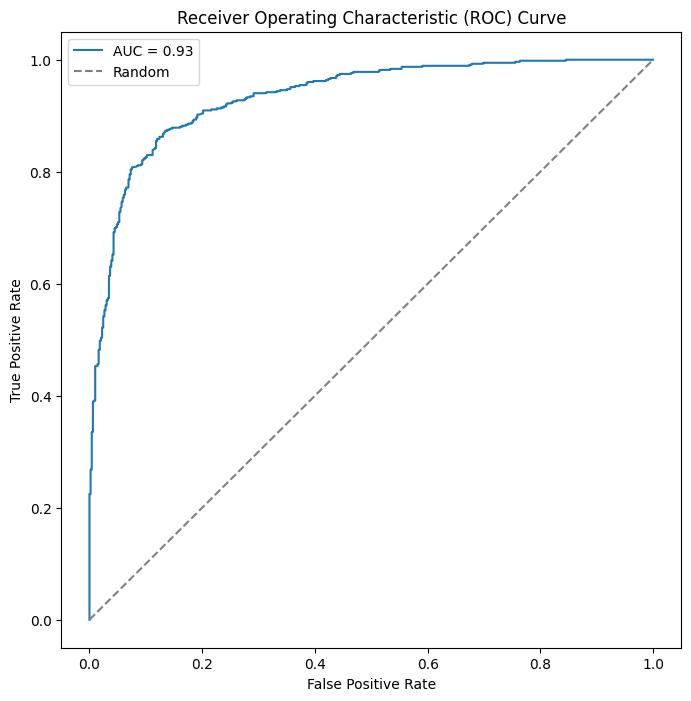

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a CSV file named 'your_dataset.csv'
df = pd.read_csv("airbnb_Chicago.csv")

# Convert the 'Scraped Date' column to datetime format
df['Scraped Date'] = pd.to_datetime(df['Scraped Date'])

# Filter the data for values between May 2020 and June 2020
filtered_df = df[(df['Scraped Date'] >= '2020-05-01') & (df['Scraped Date'] <= '2020-06-30')]

# Keep only unique samples based on 'Airbnb Host ID'
filtered_df = filtered_df.drop_duplicates(subset='Airbnb Host ID', keep='first')

# Selecting relevant features for logistic regression
features = ['rating_ave_pastYear', 'numReviews_pastYear', 'numCancel_pastYear', 'num_5_star_Rev_pastYear', 'prop_5_StarReviews_pastYear', 'hostResponseNumber_pastYear', 'hostResponseAverage_pastYear']

# Creating feature matrix X and target variable y
X = filtered_df[features]
y = filtered_df['Superhost']

# Drop rows with missing values
X = X.dropna()
y = y[X.index]  # Align y with the remaining rows in X

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initializing the logistic regression model
model = LogisticRegression()

# Fitting the model on the training data
model.fit(X_train, y_train)

# Using statsmodels to get summary
X_train_with_intercept = sm.add_constant(X_train)  # Add intercept term
log_reg_sm = sm.Logit(y_train, X_train_with_intercept)
result = log_reg_sm.fit()

# Display summary
print(result.summary())


# Making predictions on the testing data
predictions = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
print(f'Confusion Matrix:\n{conf_matrix}')

# Classification report
classification_rep = classification_report(y_test, predictions)
print(f'Classification Report:\n{classification_rep}')

# Calculate AUC
y_proba = model.predict_proba(X_test)[:, 1]  # Probability of class 1
auc = roc_auc_score(y_test, y_proba)
print(f'AUC: {auc}')

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Optimization terminated successfully.
         Current function value: 0.249353
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:              Superhost   No. Observations:                 1323
Model:                          Logit   Df Residuals:                     1305
Method:                           MLE   Df Model:                           17
Date:                Fri, 01 Dec 2023   Pseudo R-squ.:                  0.6252
Time:                        19:00:22   Log-Likelihood:                -329.89
converged:                       True   LL-Null:                       -880.14
Covariance Type:            nonrobust   LLR p-value:                2.793e-223
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                              -79.0499      9.783     -8.0

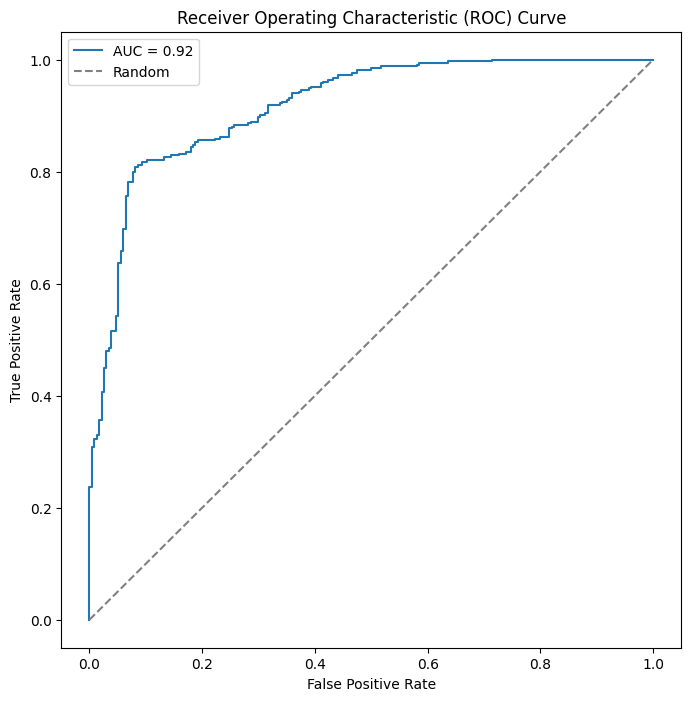

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a CSV file named 'your_dataset.csv'
df = pd.read_csv("airbnb_Chicago.csv")

# Convert the 'Scraped Date' column to datetime format
df['Scraped Date'] = pd.to_datetime(df['Scraped Date'])

# Filter the data for values between May 2020 and June 2020
filtered_df = df[(df['Scraped Date'] >= '2020-05-01') & (df['Scraped Date'] <= '2020-06-30')]

# Keep only unique samples based on 'Airbnb Host ID'
filtered_df = filtered_df.drop_duplicates(subset='Airbnb Host ID', keep='first')

# Selecting relevant features for logistic regression
features = [
    'rating_ave_pastYear', 'numReviews_pastYear', 'numCancel_pastYear', 'num_5_star_Rev_pastYear',
    'prop_5_StarReviews_pastYear', 'prev_rating_ave_pastYear', 'prev_numReviews_pastYear',
    'prev_numCancel_pastYear', 'prev_num_5_star_Rev_pastYear', 'prev_prop_5_StarReviews_pastYear',
    'numReservedDays_pastYear', 'numReserv_pastYear', 'booked_days', 'Nightly Rate',
    'available_days_aveListedPrice', 'hostResponseNumber_pastYear', 'hostResponseAverage_pastYear',
    # Add other features as needed
]

# Creating feature matrix X and target variable y
X = filtered_df[features]
y = filtered_df['Superhost']

# Drop rows with missing values
X = X.dropna()
y = y[X.index]  # Align y with the remaining rows in X

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initializing the logistic regression model
model = LogisticRegression()

# Fitting the model on the training data
model.fit(X_train, y_train)

# Using statsmodels to get summary
X_train_with_intercept = sm.add_constant(X_train)  # Add intercept term
log_reg_sm = sm.Logit(y_train, X_train_with_intercept)
result = log_reg_sm.fit()

# Display summary
print(result.summary())


# Making predictions on the testing data
predictions = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
print(f'Confusion Matrix:\n{conf_matrix}')

# Classification report
classification_rep = classification_report(y_test, predictions)
print(f'Classification Report:\n{classification_rep}')

# Calculate AUC
y_proba = model.predict_proba(X_test)[:, 1]  # Probability of class 1
auc = roc_auc_score(y_test, y_proba)
print(f'AUC: {auc}')

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

nu:
variables_to_extract = [
    'rating_ave_pastYear', 'numReviews_pastYear', 'numCancel_pastYear',
    'numReservedDays_pastYear', 'numReserv_pastYear', 'available_days',
    'available_days_aveListedPrice', 'booked_days', 'booked_days_avePrice',
    'Bedrooms', 'Bathrooms', 'Max Guests', 'Cleaning Fee (USD)',
    'Minimum Stay', 'Number of Photos', 'Instantbook Enabled', 'Nightly Rate',
    'Number of Reviews', 'Rating Overall', 'revenue', 'occupancy_rate'
]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Optimization terminated successfully.
         Current function value: 0.428201
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              Superhost   No. Observations:                 1283
Model:                          Logit   Df Residuals:                     1261
Method:                           MLE   Df Model:                           21
Date:                Fri, 01 Dec 2023   Pseudo R-squ.:                  0.3674
Time:                        20:02:24   Log-Likelihood:                -549.38
converged:                       True   LL-Null:                       -868.40
Covariance Type:            nonrobust   LLR p-value:                1.578e-121
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                           -45.5477      3.301    -13.799      0.

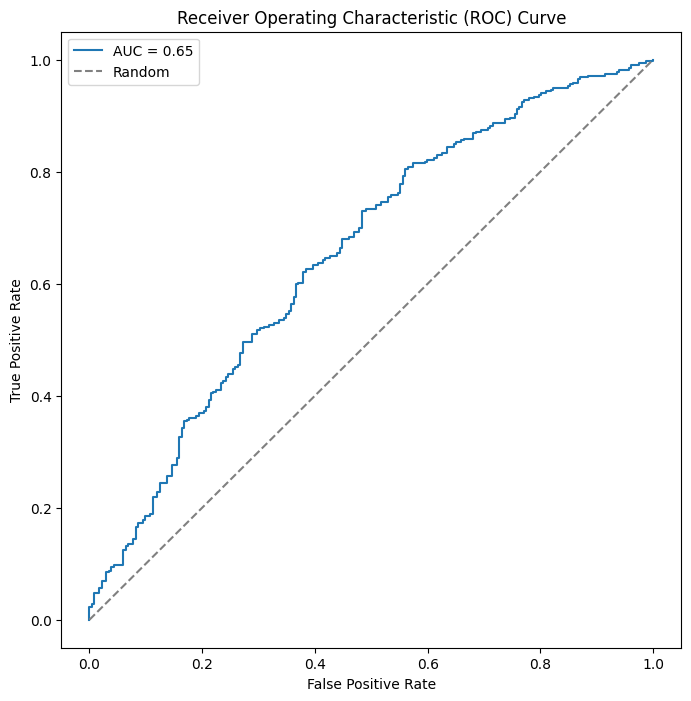

In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a CSV file named 'your_dataset.csv'
df = pd.read_csv("airbnb_Chicago.csv")

# Convert the 'Scraped Date' column to datetime format
df['Scraped Date'] = pd.to_datetime(df['Scraped Date'])

# Filter the data for values between May 2020 and June 2020
filtered_df = df[(df['Scraped Date'] >= '2020-05-01') & (df['Scraped Date'] <= '2020-06-30')]

# Keep only unique samples based on 'Airbnb Host ID'
filtered_df = filtered_df.drop_duplicates(subset='Airbnb Host ID', keep='first')

# Selecting relevant features for logistic regression
features = [ 'rating_ave_pastYear', 'numReviews_pastYear', 'numCancel_pastYear', 'numReservedDays_pastYear', 'numReserv_pastYear', 'available_days', 'available_days_aveListedPrice', 'booked_days', 'booked_days_avePrice', 'Bedrooms', 'Bathrooms', 'Max Guests', 'Cleaning Fee (USD)', 'Minimum Stay', 'Number of Photos', 'Instantbook Enabled', 'Nightly Rate', 'Number of Reviews', 'Rating Overall', 'revenue', 'occupancy_rate' ]
# Creating feature matrix X and target variable y
X = filtered_df[features]
y = filtered_df['Superhost']

# Drop rows with missing values
X = X.dropna()
y = y[X.index]  # Align y with the remaining rows in X

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initializing the logistic regression model
model = LogisticRegression()

# Fitting the model on the training data
model.fit(X_train, y_train)

# Using statsmodels to get summary
X_train_with_intercept = sm.add_constant(X_train)  # Add intercept term
log_reg_sm = sm.Logit(y_train, X_train_with_intercept)
result = log_reg_sm.fit()

# Display summary
print(result.summary())


# Making predictions on the testing data
predictions = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
print(f'Confusion Matrix:\n{conf_matrix}')

# Classification report
classification_rep = classification_report(y_test, predictions)
print(f'Classification Report:\n{classification_rep}')

# Calculate AUC
y_proba = model.predict_proba(X_test)[:, 1]  # Probability of class 1
auc = roc_auc_score(y_test, y_proba)
print(f'AUC: {auc}')

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Optimization terminated successfully.
         Current function value: 0.462709
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              Superhost   No. Observations:                 2431
Model:                          Logit   Df Residuals:                     2422
Method:                           MLE   Df Model:                            8
Date:                Fri, 01 Dec 2023   Pseudo R-squ.:                  0.3321
Time:                        20:22:15   Log-Likelihood:                -1124.8
converged:                       True   LL-Null:                       -1684.2
Covariance Type:            nonrobust   LLR p-value:                3.406e-236
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -38.3585      2.134    -17.976      0.000     -42.541     -34.176
ra

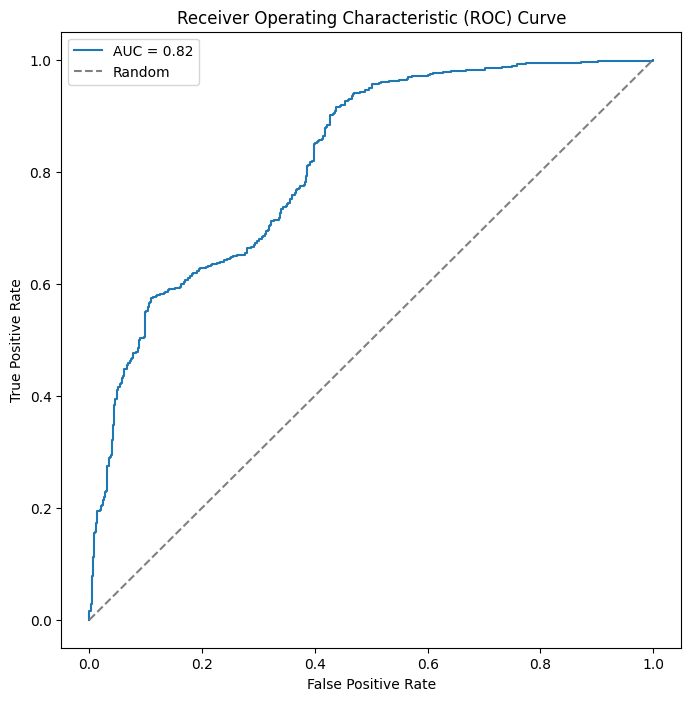

In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a CSV file named 'your_dataset.csv'
df = pd.read_csv("airbnb_Chicago.csv")

# Convert the 'Scraped Date' column to datetime format
df['Scraped Date'] = pd.to_datetime(df['Scraped Date'])

# Filter the data for values between May 2020 and June 2020
filtered_df = df[(df['Scraped Date'] >= '2020-05-01') & (df['Scraped Date'] <= '2020-06-30')]

# Keep only unique samples based on 'Airbnb Host ID'
filtered_df = filtered_df.drop_duplicates(subset='Airbnb Host ID', keep='first')

# Selecting relevant features for logistic regression
features = ['rating_ave_pastYear','numReviews_pastYear','numCancel_pastYear', 'numReserv_pastYear', 'Minimum Stay', 'Number of Photos', 'Nightly Rate', 'Number of Reviews']
# Creating feature matrix X and target variable y
X = filtered_df[features]
y = filtered_df['Superhost']

# Drop rows with missing values
X = X.dropna()
y = y[X.index]  # Align y with the remaining rows in X

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initializing the logistic regression model
model = LogisticRegression()

# Fitting the model on the training data
model.fit(X_train, y_train)

# Using statsmodels to get summary
X_train_with_intercept = sm.add_constant(X_train)  # Add intercept term
log_reg_sm = sm.Logit(y_train, X_train_with_intercept)
result = log_reg_sm.fit()

# Display summary
print(result.summary())

# Making predictions on the testing data
predictions = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
print(f'Confusion Matrix:\n{conf_matrix}')

# Classification report
classification_rep = classification_report(y_test, predictions)
print(f'Classification Report:\n{classification_rep}')

# Calculate AUC
y_proba = model.predict_proba(X_test)[:, 1]  # Probability of class 1
auc = roc_auc_score(y_test, y_proba)
print(f'AUC: {auc}')

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


VIF Values:
              Variable       VIF
0  rating_ave_pastYear  4.680272
1  numReviews_pastYear  1.572890
2   numCancel_pastYear  1.184270
3   numReserv_pastYear  1.096960
4         Minimum Stay  1.112567
5     Number of Photos  3.766970
6         Nightly Rate  2.507021
7    Number of Reviews  2.004340
Optimization terminated successfully.
         Current function value: 0.462709
         Iterations 8


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                           Logit Regression Results                           
Dep. Variable:              Superhost   No. Observations:                 2431
Model:                          Logit   Df Residuals:                     2422
Method:                           MLE   Df Model:                            8
Date:                Fri, 01 Dec 2023   Pseudo R-squ.:                  0.3321
Time:                        20:23:55   Log-Likelihood:                -1124.8
converged:                       True   LL-Null:                       -1684.2
Covariance Type:            nonrobust   LLR p-value:                3.406e-236
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -38.3585      2.134    -17.976      0.000     -42.541     -34.176
rating_ave_pastYear     7.7380      0.433     17.858      0.000       6.889       8.587
numReviews_pastY

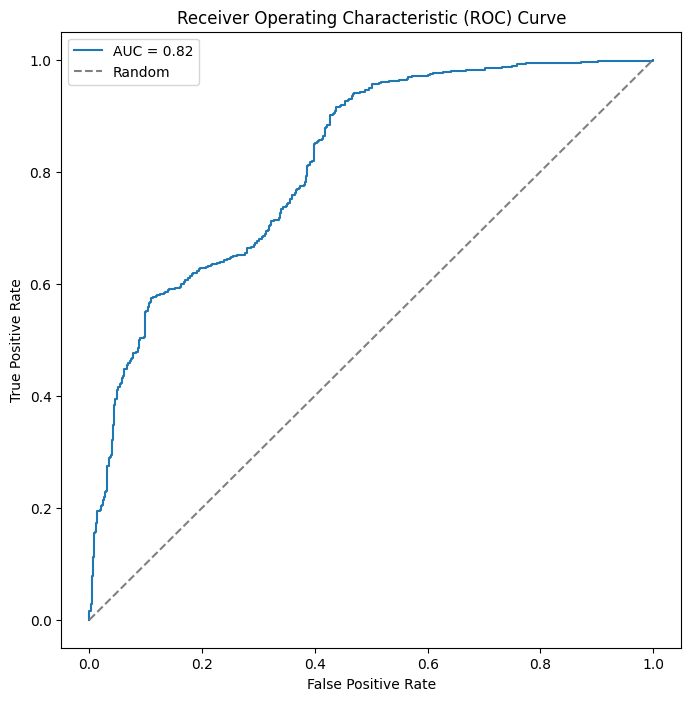

In [74]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a CSV file named 'your_dataset.csv'
df = pd.read_csv("airbnb_Chicago.csv")

# Convert the 'Scraped Date' column to datetime format
df['Scraped Date'] = pd.to_datetime(df['Scraped Date'])

# Filter the data for values between May 2020 and June 2020
filtered_df = df[(df['Scraped Date'] >= '2020-05-01') & (df['Scraped Date'] <= '2020-06-30')]

# Keep only unique samples based on 'Airbnb Host ID'
filtered_df = filtered_df.drop_duplicates(subset='Airbnb Host ID', keep='first')

# Selecting relevant features for logistic regression
features = ['rating_ave_pastYear', 'numReviews_pastYear', 'numCancel_pastYear', 'numReserv_pastYear', 'Minimum Stay', 'Number of Photos', 'Nightly Rate', 'Number of Reviews']
# Creating feature matrix X and target variable y
X = filtered_df[features]
y = filtered_df['Superhost']

# Drop rows with missing values
X = X.dropna()
y = y[X.index]  # Align y with the remaining rows in X

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF values
print("VIF Values:")
print(vif_data)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initializing the logistic regression model
model = LogisticRegression()

# Fitting the model on the training data
model.fit(X_train, y_train)

# Using statsmodels to get summary
X_train_with_intercept = sm.add_constant(X_train)  # Add intercept term
log_reg_sm = sm.Logit(y_train, X_train_with_intercept)
result = log_reg_sm.fit()

# Display summary
print(result.summary())

# Making predictions on the testing data
predictions = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
print(f'Confusion Matrix:\n{conf_matrix}')

# Classification report
classification_rep = classification_report(y_test, predictions)
print(f'Classification Report:\n{classification_rep}')

# Calculate AUC
y_proba = model.predict_proba(X_test)[:, 1]  # Probability of class 1
auc = roc_auc_score(y_test, y_proba)
print(f'AUC: {auc}')

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


<ipython-input-6-2e00090f6018>:13: DtypeWarning: Columns (59) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(f"airbnb_{city}.csv")
<ipython-input-6-2e00090f6018>:13: DtypeWarning: Columns (59) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(f"airbnb_{city}.csv")
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Optimization terminated successfully.
         Current function value: 0.329614
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:              Superhost   No. Observations:                 6488
Model:                          Logit   Df Residuals:                     6480
Method:                           MLE   Df Model:                            7
Date:                Mon, 04 Dec 2023   Pseudo R-squ.:                  0.5240
Time:                        19:00:30   Log-Likelihood:                -2138.5
converged:                       True   LL-Null:                       -4492.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                          -60.1578      4.320    -13.925      0.00

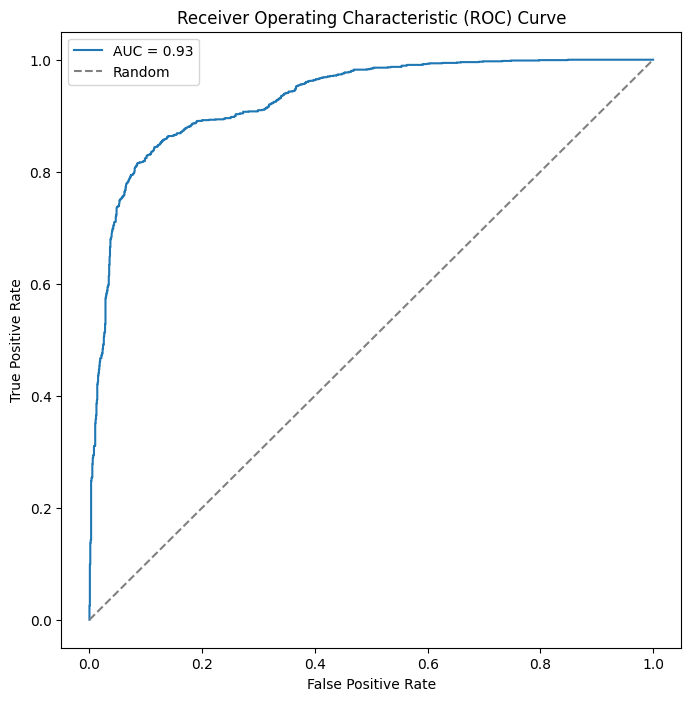

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import statsmodels.api as sm
import matplotlib.pyplot as plt

cities = ["Chicago", "Dallas", "Houston", "Oakland", "Washington","Boston"]
# Assuming your dataset is stored in a CSV file named 'your_dataset.csv'
df = pd.read_csv("airbnb_Boston.csv")

for city in cities:
    df1 = pd.read_csv(f"airbnb_{city}.csv")
    df = pd.concat([df, df1], ignore_index=True)

# Convert the 'Scraped Date' column to datetime format
df['Scraped Date'] = pd.to_datetime(df['Scraped Date'])

# Filter the data for values between May 2020 and June 2020
filtered_df = df[(df['Scraped Date'] >= '2020-05-01') & (df['Scraped Date'] <= '2020-06-30')]

# Keep only unique samples based on 'Airbnb Host ID'
filtered_df = filtered_df.drop_duplicates(subset='Airbnb Host ID', keep='first')

# Selecting relevant features for logistic regression
features = ['rating_ave_pastYear', 'numReviews_pastYear', 'numCancel_pastYear', 'num_5_star_Rev_pastYear', 'prop_5_StarReviews_pastYear', 'hostResponseNumber_pastYear', 'hostResponseAverage_pastYear', ]

# Creating feature matrix X and target variable y
X = filtered_df[features]
y = filtered_df['Superhost']

# Drop rows with missing values
X = X.dropna()
y = y[X.index]  # Align y with the remaining rows in X

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initializing the logistic regression model
model = LogisticRegression()

# Fitting the model on the training data
model.fit(X_train, y_train)

# Using statsmodels to get summary
X_train_with_intercept = sm.add_constant(X_train)  # Add intercept term
log_reg_sm = sm.Logit(y_train, X_train_with_intercept)
result = log_reg_sm.fit()

# Display summary
print(result.summary())


# Making predictions on the testing data
predictions = model.predict(X_test)
print(predictions)
# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
print(f'Confusion Matrix:\n{conf_matrix}')

# Classification report
classification_rep = classification_report(y_test, predictions)
print(f'Classification Report:\n{classification_rep}')

# Calculate AUC
y_proba = model.predict_proba(X_test)[:, 1]  # Probability of class 1
auc = roc_auc_score(y_test, y_proba)
print(f'AUC: {auc}')

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

<ipython-input-9-cb100c3b6985>:13: DtypeWarning: Columns (59) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(f"airbnb_{city}.csv")
<ipython-input-9-cb100c3b6985>:13: DtypeWarning: Columns (59) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(f"airbnb_{city}.csv")
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Optimization terminated successfully.
         Current function value: 0.329614
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:              Superhost   No. Observations:                 6488
Model:                          Logit   Df Residuals:                     6480
Method:                           MLE   Df Model:                            7
Date:                Mon, 04 Dec 2023   Pseudo R-squ.:                  0.5240
Time:                        19:13:16   Log-Likelihood:                -2138.5
converged:                       True   LL-Null:                       -4492.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                          -60.1578      4.320    -13.925      0.00

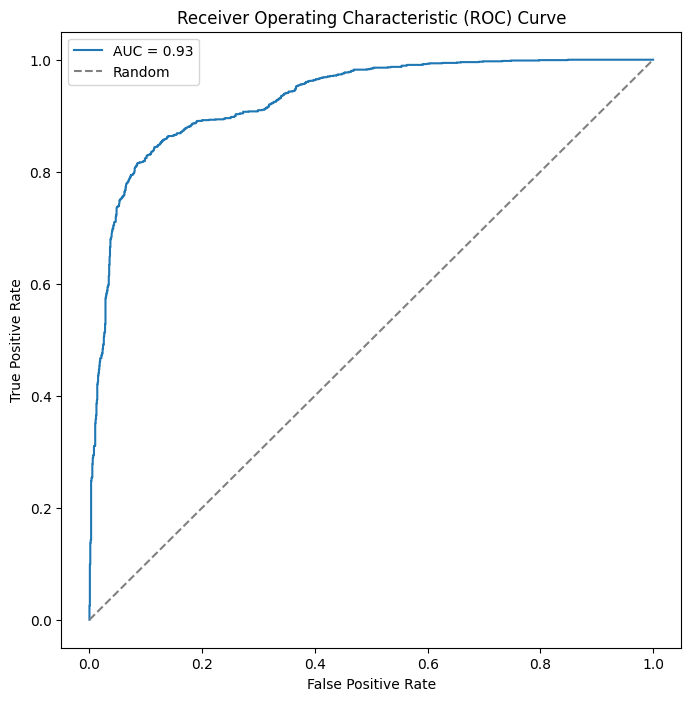

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import statsmodels.api as sm
import matplotlib.pyplot as plt
#with ptobability
cities = ["Chicago", "Dallas", "Houston", "Oakland", "Washington"]
# Assuming your dataset is stored in a CSV file named 'your_dataset.csv'
df = pd.read_csv("airbnb_Boston.csv")

for city in cities:
    df1 = pd.read_csv(f"airbnb_{city}.csv")
    df = pd.concat([df, df1], ignore_index=True)

# Convert the 'Scraped Date' column to datetime format
df['Scraped Date'] = pd.to_datetime(df['Scraped Date'])

# Filter the data for values between May 2020 and June 2020
filtered_df = df[(df['Scraped Date'] >= '2020-05-01') & (df['Scraped Date'] <= '2020-06-30')]

# Keep only unique samples based on 'Airbnb Host ID'
filtered_df = filtered_df.drop_duplicates(subset='Airbnb Host ID', keep='first')

# Selecting relevant features for logistic regression
features = ['rating_ave_pastYear', 'numReviews_pastYear', 'numCancel_pastYear', 'num_5_star_Rev_pastYear', 'prop_5_StarReviews_pastYear', 'hostResponseNumber_pastYear', 'hostResponseAverage_pastYear', ]

# Creating feature matrix X and target variable y
X = filtered_df[features]
y = filtered_df['Superhost']

# Drop rows with missing values
X = X.dropna()
y = y[X.index]  # Align y with the remaining rows in X

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initializing the logistic regression model
model = LogisticRegression()

# Fitting the model on the training data
model.fit(X_train, y_train)

# Using statsmodels to get summary
X_train_with_intercept = sm.add_constant(X_train)  # Add intercept term
log_reg_sm = sm.Logit(y_train, X_train_with_intercept)
result = log_reg_sm.fit()

# Display summary
print(result.summary())

# Making predictions on the testing data
predictions = model.predict(X_test)

# Calculate predicted probabilities
predicted_probabilities = model.predict_proba(X_test)[:, 1]

# Add a new column to the original dataframe for predicted probabilities
filtered_df['Predicted Probability'] = 0  # Initialize with zeros
filtered_df.loc[X_test.index, 'Predicted Probability'] = predicted_probabilities

# Display predicted probabilities in the original dataframe
print(filtered_df[['Airbnb Host ID', 'Superhost', 'Predicted Probability']])

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
print(f'Confusion Matrix:\n{conf_matrix}')

# Classification report
classification_rep = classification_report(y_test, predictions)
print(f'Classification Report:\n{classification_rep}')

# Calculate AUC
y_proba = model.predict_proba(X_test)[:, 1]  # Probability of class 1
auc = roc_auc_score(y_test, y_proba)
print(f'AUC: {auc}')

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import statsmodels.api as sm
import matplotlib.pyplot as plt
#probability with threashold
cities = ["Chicago", "Dallas", "Houston", "Oakland", "Washington"]
# Assuming your dataset is stored in a CSV file named 'your_dataset.csv'
df = pd.read_csv("airbnb_Boston.csv")

for city in cities:
    df1 = pd.read_csv(f"airbnb_{city}.csv")
    df = pd.concat([df, df1], ignore_index=True)

# Convert the 'Scraped Date' column to datetime format
df['Scraped Date'] = pd.to_datetime(df['Scraped Date'])

# Filter the data for values between May 2020 and June 2020
filtered_df = df[(df['Scraped Date'] >= '2020-05-01') & (df['Scraped Date'] <= '2020-06-30')]

# Keep only unique samples based on 'Airbnb Host ID'
filtered_df = filtered_df.drop_duplicates(subset='Airbnb Host ID', keep='first')

# Selecting relevant features for logistic regression
features = ['rating_ave_pastYear', 'numReviews_pastYear', 'numCancel_pastYear', 'num_5_star_Rev_pastYear',
            'prop_5_StarReviews_pastYear', 'hostResponseNumber_pastYear', 'hostResponseAverage_pastYear', ]

# Creating feature matrix X and target variable y
X = filtered_df[features]
y = filtered_df['Superhost']

# Drop rows with missing values
X = X.dropna()
y = y[X.index]  # Align y with the remaining rows in X

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initializing the logistic regression model
model = LogisticRegression()

# Fitting the model on the training data
model.fit(X_train, y_train)

# Using statsmodels to get summary
X_train_with_intercept = sm.add_constant(X_train)  # Add intercept term
log_reg_sm = sm.Logit(y_train, X_train_with_intercept)
result = log_reg_sm.fit()

# Display summary
print(result.summary())

# Making predictions on the testing data
predictions = model.predict(X_test)

# Calculate predicted probabilities
predicted_probabilities = model.predict_proba(X_test)[:, 1]

# Add a new column to the original dataframe for predicted probabilities
filtered_df['Predicted Probability'] = 0  # Initialize with zeros
filtered_df.loc[X_test.index, 'Predicted Probability'] = predicted_probabilities

# Display predicted probabilities in the original dataframe
print(filtered_df[['Airbnb Host ID', 'Superhost', 'Predicted Probability']])

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

# Confusion matrix for different thresholds
thresholds = [0.25, 0.5, 0.75]

for threshold in thresholds:
    predicted_labels = (predicted_probabilities > threshold).astype(int)
    conf_matrix = confusion_matrix(y_test, predicted_labels)
    print(f'\nConfusion Matrix (Threshold = {threshold}): \n{conf_matrix}')
    classification_rep = classification_report(y_test, predicted_labels)
    print(f'Classification Report (Threshold = {threshold}):\n{classification_rep}')


<ipython-input-10-6f8d70a417f7>:13: DtypeWarning: Columns (59) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(f"airbnb_{city}.csv")
<ipython-input-10-6f8d70a417f7>:13: DtypeWarning: Columns (59) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(f"airbnb_{city}.csv")
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Optimization terminated successfully.
         Current function value: 0.329614
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:              Superhost   No. Observations:                 6488
Model:                          Logit   Df Residuals:                     6480
Method:                           MLE   Df Model:                            7
Date:                Mon, 04 Dec 2023   Pseudo R-squ.:                  0.5240
Time:                        19:14:03   Log-Likelihood:                -2138.5
converged:                       True   LL-Null:                       -4492.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                          -60.1578      4.320    -13.925      0.00

<ipython-input-12-631e6780bf09>:21: DtypeWarning: Columns (59) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(f"airbnb_{city}.csv")
<ipython-input-12-631e6780bf09>:21: DtypeWarning: Columns (59) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(f"airbnb_{city}.csv")
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Optimization terminated successfully.
         Current function value: 0.329614
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:              Superhost   No. Observations:                 6488
Model:                          Logit   Df Residuals:                     6480
Method:                           MLE   Df Model:                            7
Date:                Mon, 04 Dec 2023   Pseudo R-squ.:                  0.5240
Time:                        19:18:11   Log-Likelihood:                -2138.5
converged:                       True   LL-Null:                       -4492.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                          -60.1578      4.320    -13.925      0.00

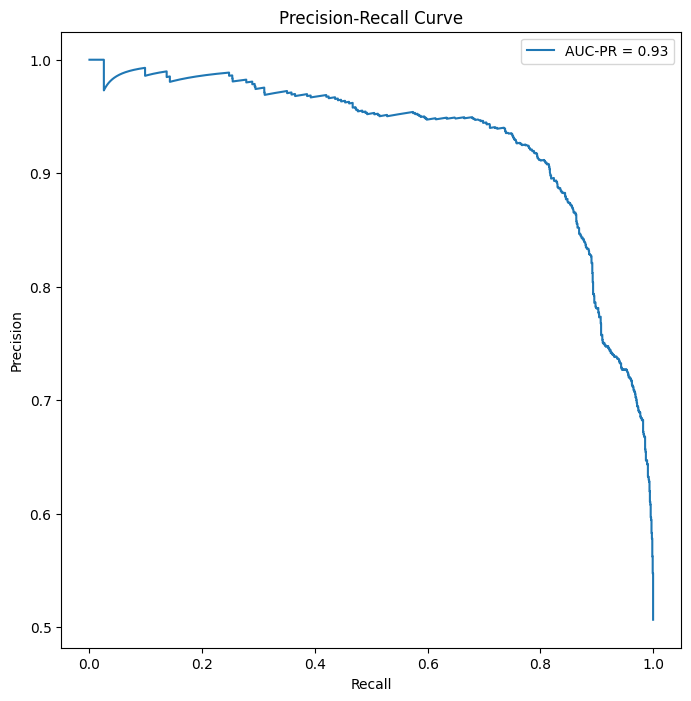

AUC for ROC Curve: 0.93
AUC for Precision-Recall Curve: 0.93


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
    auc,
)
import statsmodels.api as sm
import matplotlib.pyplot as plt

cities = ["Chicago", "Dallas", "Houston", "Oakland", "Washington"]
# Assuming your dataset is stored in a CSV file named 'your_dataset.csv'
df = pd.read_csv("airbnb_Boston.csv")

for city in cities:
    df1 = pd.read_csv(f"airbnb_{city}.csv")
    df = pd.concat([df, df1], ignore_index=True)

# Convert the 'Scraped Date' column to datetime format
df['Scraped Date'] = pd.to_datetime(df['Scraped Date'])

# Filter the data for values between May 2020 and June 2020
filtered_df = df[(df['Scraped Date'] >= '2020-05-01') & (df['Scraped Date'] <= '2020-06-30')]

# Keep only unique samples based on 'Airbnb Host ID'
filtered_df = filtered_df.drop_duplicates(subset='Airbnb Host ID', keep='first')

# Selecting relevant features for logistic regression
features = [
    'rating_ave_pastYear',
    'numReviews_pastYear',
    'numCancel_pastYear',
    'num_5_star_Rev_pastYear',
    'prop_5_StarReviews_pastYear',
    'hostResponseNumber_pastYear',
    'hostResponseAverage_pastYear',
]

# Creating feature matrix X and target variable y
X = filtered_df[features]
y = filtered_df['Superhost']

# Drop rows with missing values
X = X.dropna()
y = y[X.index]  # Align y with the remaining rows in X

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initializing the logistic regression model
model = LogisticRegression()

# Fitting the model on the training data
model.fit(X_train, y_train)

# Using statsmodels to get summary
X_train_with_intercept = sm.add_constant(X_train)  # Add intercept term
log_reg_sm = sm.Logit(y_train, X_train_with_intercept)
result = log_reg_sm.fit()

# Display summary
print(result.summary())

# Making predictions on the testing data
predictions = model.predict(X_test)

# Calculate predicted probabilities
predicted_probabilities = model.predict_proba(X_test)[:, 1]

# Add a new column to the original dataframe for predicted probabilities
filtered_df['Predicted Probability'] = 0  # Initialize with zeros
filtered_df.loc[X_test.index, 'Predicted Probability'] = predicted_probabilities

# Display predicted probabilities in the original dataframe
print(filtered_df[['Airbnb Host ID', 'Superhost', 'Predicted Probability']])

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

# Confusion matrix for different thresholds
thresholds = [0.25, 0.5, 0.75]

for threshold in thresholds:
    predicted_labels = (predicted_probabilities > threshold).astype(int)
    conf_matrix = confusion_matrix(y_test, predicted_labels)
    print(f'\nConfusion Matrix (Threshold = {threshold}): \n{conf_matrix}')
    classification_rep = classification_report(y_test, predicted_labels)
    print(f'Classification Report (Threshold = {threshold}):\n{classification_rep}')
# Calculate AUC for PR curve
auc_pr = auc(recall, precision)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 8))
plt.plot(recall, precision, label=f'AUC-PR = {auc_pr:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Print AUC for PR curve
print(f'AUC for ROC Curve: {auc_roc:.2f}')
print(f'AUC for Precision-Recall Curve: {auc_pr:.2f}')


________________________________________________________________________________

<ipython-input-42-dd488ce1b7e3>:22: DtypeWarning: Columns (59) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(f"airbnb_{city}.csv")
<ipython-input-42-dd488ce1b7e3>:22: DtypeWarning: Columns (59) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(f"airbnb_{city}.csv")


Optimization terminated successfully.
         Current function value: 0.329614
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:              Superhost   No. Observations:                 6488
Model:                          Logit   Df Residuals:                     6480
Method:                           MLE   Df Model:                            7
Date:                Mon, 04 Dec 2023   Pseudo R-squ.:                  0.5240
Time:                        20:26:38   Log-Likelihood:                -2138.5
converged:                       True   LL-Null:                       -4492.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                          -60.1578      4.320    -13.925      0.00

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


        Airbnb Host ID  Superhost  Logistic Regression Predicted Probability  \
14              4804.0        1.0                               3.543386e-01   
24             26988.0        1.0                               0.000000e+00   
172            38997.0        0.0                               0.000000e+00   
260            85130.0        0.0                               8.440975e-17   
292            85770.0        0.0                               0.000000e+00   
...                ...        ...                                        ...   
462491      17007286.0        0.0                               1.456522e-01   
462664      16252186.0        0.0                               0.000000e+00   
462707      89325275.0        1.0                               9.993650e-01   
462735       6066744.0        0.0                               0.000000e+00   
462745      25683126.0        1.0                               0.000000e+00   

        Gradient Boosting Predicted Pro

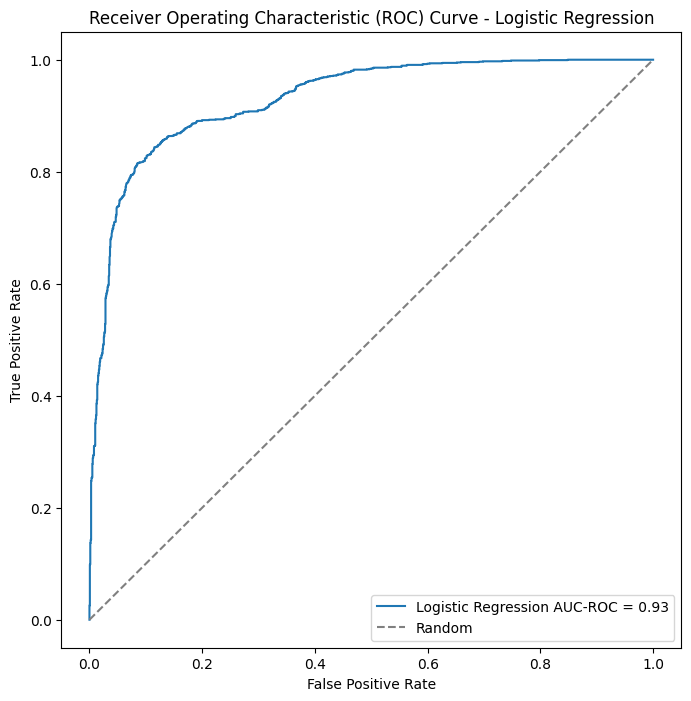

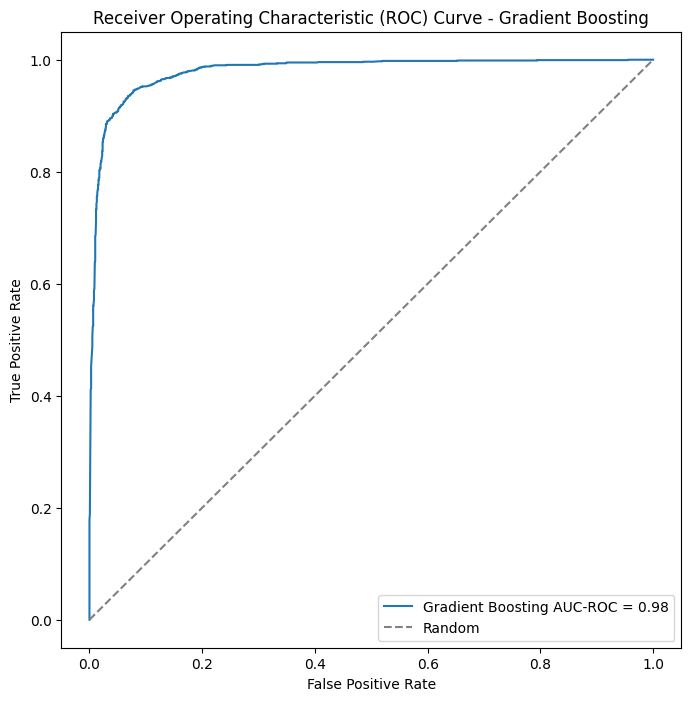

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
    auc,
)
import statsmodels.api as sm
import matplotlib.pyplot as plt

cities = ["Chicago", "Dallas", "Houston", "Oakland", "Washington", "Boston"]
# Assuming your dataset is stored in a CSV file named 'your_dataset.csv'
df = pd.read_csv("airbnb_Boston.csv")

for city in cities:
    df1 = pd.read_csv(f"airbnb_{city}.csv")
    df = pd.concat([df, df1], ignore_index=True)

# Convert the 'Scraped Date' column to datetime format
df['Scraped Date'] = pd.to_datetime(df['Scraped Date'])

# Filter the data for values between May 2020 and June 2020
filtered_df = df[(df['Scraped Date'] >= '2020-05-01') & (df['Scraped Date'] <= '2020-06-30')]

# Keep only unique samples based on 'Airbnb Host ID'
filtered_df = filtered_df.drop_duplicates(subset='Airbnb Host ID', keep='first')

# Selecting relevant features for logistic regression
features = [
    'rating_ave_pastYear',
    'numReviews_pastYear',
    'numCancel_pastYear',
    'num_5_star_Rev_pastYear',
    'prop_5_StarReviews_pastYear',
    'hostResponseNumber_pastYear',
    'hostResponseAverage_pastYear',
]

# Creating feature matrix X and target variable y
X = filtered_df[features]
y = filtered_df['Superhost']

# Drop rows with missing values
X = X.dropna()
y = y[X.index]  # Align y with the remaining rows in X

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initializing the logistic regression model
logistic_model = LogisticRegression()

# Using statsmodels to get summary
X_train_with_intercept = sm.add_constant(X_train)  # Add intercept term
log_reg_sm = sm.Logit(y_train, X_train_with_intercept)
result = log_reg_sm.fit()

# Display summary for logistic regression
print(result.summary())

# Fitting the logistic regression model on the training data
logistic_model.fit(X_train, y_train)

# Making predictions on the testing data for logistic regression
logistic_predictions = logistic_model.predict(X_test)

# Calculate predicted probabilities for logistic regression
logistic_predicted_probabilities = logistic_model.predict_proba(X_test)[:, 1]

# Initializing the Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=150,learning_rate=0.05,random_state=42)

# Fitting the Gradient Boosting model on the training data
gb_model.fit(X_train, y_train)

# Making predictions on the testing data for Gradient Boosting
gb_predictions = gb_model.predict(X_test)

# Calculate predicted probabilities for Gradient Boosting
gb_predicted_probabilities = gb_model.predict_proba(X_test)[:, 1]

# Display predicted probabilities in the original dataframe for logistic regression
filtered_df['Logistic Regression Predicted Probability'] = 0  # Initialize with zeros
filtered_df.loc[X_test.index, 'Logistic Regression Predicted Probability'] = logistic_predicted_probabilities

# Display predicted probabilities in the original dataframe for Gradient Boosting
filtered_df['Gradient Boosting Predicted Probability'] = 0  # Initialize with zeros
filtered_df.loc[X_test.index, 'Gradient Boosting Predicted Probability'] = gb_predicted_probabilities

# Display predicted probabilities in the original dataframe
print(filtered_df[['Airbnb Host ID', 'Superhost', 'Logistic Regression Predicted Probability', 'Gradient Boosting Predicted Probability']])

# Calculate accuracy for logistic regression
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
print(f'Logistic Regression Accuracy: {logistic_accuracy}')

# Calculate accuracy for Gradient Boosting
gb_accuracy = accuracy_score(y_test, gb_predictions)
print(f'Gradient Boosting Accuracy: {gb_accuracy}')

# Confusion matrix for logistic regression
logistic_conf_matrix = confusion_matrix(y_test, logistic_predictions)
print(f'Logistic Regression Confusion Matrix:\n{logistic_conf_matrix}')

# Confusion matrix for Gradient Boosting
gb_conf_matrix = confusion_matrix(y_test, gb_predictions)
print(f'Gradient Boosting Confusion Matrix:\n{gb_conf_matrix}')

# Classification report for logistic regression
logistic_classification_rep = classification_report(y_test, logistic_predictions)
print(f'Logistic Regression Classification Report:\n{logistic_classification_rep}')

# Classification report for Gradient Boosting
gb_classification_rep = classification_report(y_test, gb_predictions)
print(f'Gradient Boosting Classification Report:\n{gb_classification_rep}')

# Calculate AUC for ROC curve for logistic regression
logistic_y_proba = logistic_model.predict_proba(X_test)[:, 1]
logistic_auc_roc = roc_auc_score(y_test, logistic_y_proba)

# Calculate AUC for ROC curve for Gradient Boosting
gb_y_proba = gb_model.predict_proba(X_test)[:, 1]
gb_auc_roc = roc_auc_score(y_test, gb_y_proba)

import numpy as np

# Thresholds
thresholds_gb = [0.25, 0.5, 0.75]

for threshold_gb in thresholds_gb:
    # Predicted labels based on the threshold
    gb_predicted_labels = (gb_predicted_probabilities > threshold_gb).astype(int)

    # Confusion matrix
    gb_conf_matrix = confusion_matrix(y_test, gb_predicted_labels)

    # Display confusion matrix
    print(f'\nConfusion Matrix (Threshold = {threshold_gb}): \n{gb_conf_matrix}')
    gb_classification_rep = classification_report(y_test, gb_predicted_labels)
    print(f'Classification Report (Threshold = {threshold_gb}):\n{gb_classification_rep}')


# Plot ROC curve for logistic regression
logistic_fpr, logistic_tpr, logistic_thresholds_roc = roc_curve(y_test, logistic_y_proba)
plt.figure(figsize=(8, 8))
plt.plot(logistic_fpr, logistic_tpr, label=f'Logistic Regression AUC-ROC = {logistic_auc_roc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Logistic Regression')
plt.legend()
plt.show()

# Plot ROC curve for Gradient Boosting
gb_fpr, gb_tpr, gb_thresholds_roc = roc_curve(y_test, gb_y_proba)
plt.figure(figsize=(8, 8))
plt.plot(gb_fpr, gb_tpr, label=f'Gradient Boosting AUC-ROC = {gb_auc_roc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Gradient Boosting')
plt.legend()
plt.show()


In [23]:
import pandas as pd


# Convert the 'Scraped Date' column to datetime format
df['Scraped Date'] = pd.to_datetime(df['Scraped Date'])

# Filter the data for values between May 2020 and June 2020
filtered_df = df[(df['Scraped Date'] >= '2020-05-01') & (df['Scraped Date'] <= '2020-06-30')]

# Calculate average revenue for Superhosts and non-Superhosts
superhost_avg_revenue = filtered_df[filtered_df['Superhost'] == 1]['revenue'].mean()
non_superhost_avg_revenue = filtered_df[filtered_df['Superhost'] == 0]['revenue'].mean()

print(f'Average Revenue for Superhosts: ${superhost_avg_revenue:.2f}')
print(f'Average Revenue for Non-Superhosts: ${non_superhost_avg_revenue:.2f}')


Average Revenue for Superhosts: $3159.46
Average Revenue for Non-Superhosts: $2475.30


In [25]:
from scipy.stats import ttest_ind



# Convert the 'Scraped Date' column to datetime format
df['Scraped Date'] = pd.to_datetime(df['Scraped Date'])

# Filter the data for values between May 2020 and June 2020
filtered_df = df[(df['Scraped Date'] >= '2020-05-01') & (df['Scraped Date'] <= '2020-06-30')]

# Remove rows with missing or zero revenue values
filtered_df = filtered_df[(filtered_df['revenue'].notnull()) & (filtered_df['revenue'] != 0)]

# Separate revenue for Superhosts and non-Superhosts
superhost_revenue = filtered_df[filtered_df['Superhost'] == 1]['revenue']
non_superhost_revenue = filtered_df[filtered_df['Superhost'] == 0]['revenue']

# Perform t-test
t_statistic, p_value = ttest_ind(superhost_revenue, non_superhost_revenue, equal_var=False, nan_policy='omit')

# Check the p-value
alpha = 0.05
print(f'Test Statistic: {t_statistic:.4f}')
print(f'P-value: {p_value:.4f}')

# Check for significance
if p_value < alpha:
    print("The difference in revenue between Superhosts and non-Superhosts is statistically significant.")
else:
    print("There is no significant difference in revenue between Superhosts and non-Superhosts.")


Test Statistic: 7.8599
P-value: 0.0000
The difference in revenue between Superhosts and non-Superhosts is statistically significant.


In [30]:
from scipy.stats import ttest_ind


# Convert the 'Scraped Date' column to datetime format
df['Scraped Date'] = pd.to_datetime(df['Scraped Date'])

# Filter the data for values between May 2020 and June 2020
filtered_df = df[(df['Scraped Date'] >= '2020-05-01') & (df['Scraped Date'] <= '2020-06-30')]

# Remove rows with missing or zero values in the 'booked_days_avePrice' column
filtered_df = filtered_df[(filtered_df['booked_days_avePrice'].notnull()) & (filtered_df['booked_days_avePrice'] != 0)]

# Separate booked days' average price for Superhosts and non-Superhosts
superhost_avg_price = filtered_df[filtered_df['Superhost'] == 1]['booked_days_avePrice']
non_superhost_avg_price = filtered_df[filtered_df['Superhost'] == 0]['booked_days_avePrice']

# Print out the average booked days' average price for both Superhosts and non-Superhosts
print(f'Average Booked Days\' Average Price for Superhosts: ${superhost_avg_price.mean():.2f}')
print(f'Average Booked Days\' Average Price for Non-Superhosts: ${non_superhost_avg_price.mean():.2f}')

# Perform t-test
t_statistic, p_value = ttest_ind(superhost_avg_price, non_superhost_avg_price, equal_var=False, nan_policy='omit')

# Check the p-value
alpha = 0.05
print(f'\nTest Statistic: {t_statistic:.4f}')
print(f'P-value: {p_value:.4f}')

# Check for significance
if p_value < alpha:
    print("The difference in booked days' average price between Superhosts and non-Superhosts is statistically significant.")
else:
    print("There is no significant difference in booked days' average price between Superhosts and non-Superhosts.")


Average Booked Days' Average Price for Superhosts: $138.12
Average Booked Days' Average Price for Non-Superhosts: $153.09

Test Statistic: -5.4455
P-value: 0.0000
The difference in booked days' average price between Superhosts and non-Superhosts is statistically significant.


In [33]:
from scipy.stats import ttest_ind


# Convert the 'Scraped Date' column to datetime format
df['Scraped Date'] = pd.to_datetime(df['Scraped Date'])

# Filter the data for values between May 2020 and June 2020
filtered_df = df[(df['Scraped Date'] >= '2020-05-01') & (df['Scraped Date'] <= '2020-06-30')]

# Remove rows with missing or zero values in the relevant columns
filtered_df = filtered_df[(filtered_df['occupancy_rate'].notnull()) & (filtered_df['occupancy_rate'] != 0)]
filtered_df = filtered_df[(filtered_df['available_days'].notnull()) & (filtered_df['available_days'] != 0)]
filtered_df = filtered_df[(filtered_df['booked_days'].notnull()) & (filtered_df['booked_days'] != 0)]

# Separate data for Superhosts and non-Superhosts
superhost_occupancy_rate = filtered_df[filtered_df['Superhost'] == 1]['occupancy_rate']
non_superhost_occupancy_rate = filtered_df[filtered_df['Superhost'] == 0]['occupancy_rate']

superhost_available_days = filtered_df[filtered_df['Superhost'] == 1]['available_days']
non_superhost_available_days = filtered_df[filtered_df['Superhost'] == 0]['available_days']

superhost_booked_days = filtered_df[filtered_df['Superhost'] == 1]['booked_days']
non_superhost_booked_days = filtered_df[filtered_df['Superhost'] == 0]['booked_days']

# Print out the statistics
print(f'Occupancy Rate for Superhosts: Mean={superhost_occupancy_rate.mean():.4f}, Std={superhost_occupancy_rate.std():.4f}')
print(f'Occupancy Rate for Non-Superhosts: Mean={non_superhost_occupancy_rate.mean():.4f}, Std={non_superhost_occupancy_rate.std():.4f}')

print(f'\nAvailable Days for Superhosts: Mean={superhost_available_days.mean():.4f}, Std={superhost_available_days.std():.4f}')
print(f'Available Days for Non-Superhosts: Mean={non_superhost_available_days.mean():.4f}, Std={non_superhost_available_days.std():.4f}')

print(f'\nBooked Days for Superhosts: Mean={superhost_booked_days.mean():.4f}, Std={superhost_booked_days.std():.4f}')
print(f'Booked Days for Non-Superhosts: Mean={non_superhost_booked_days.mean():.4f}, Std={non_superhost_booked_days.std():.4f}')

# Perform t-tests
t_stat_occ, p_value_occ = ttest_ind(superhost_occupancy_rate, non_superhost_occupancy_rate, equal_var=False, nan_policy='omit')
t_stat_avail, p_value_avail = ttest_ind(superhost_available_days, non_superhost_available_days, equal_var=False, nan_policy='omit')
t_stat_booked, p_value_booked = ttest_ind(superhost_booked_days, non_superhost_booked_days, equal_var=False, nan_policy='omit')

# Check the p-values
alpha = 0.05
print(f'\nOccupancy Rate Hypothesis Test: Test Statistic={t_stat_occ:.4f}, P-value={p_value_occ:.4f}')
print(f'Available Days Hypothesis Test: Test Statistic={t_stat_avail:.4f}, P-value={p_value_avail:.4f}')
print(f'Booked Days Hypothesis Test: Test Statistic={t_stat_booked:.4f}, P-value={p_value_booked:.4f}')

# Check for significance
if p_value_occ < alpha:
    print("The difference in occupancy rate between Superhosts and non-Superhosts is statistically significant.")
else:
    print("There is no significant difference in occupancy rate between Superhosts and non-Superhosts.")

if p_value_avail < alpha:
    print("The difference in available days between Superhosts and non-Superhosts is statistically significant.")
else:
    print("There is no significant difference in available days between Superhosts and non-Superhosts.")

if p_value_booked < alpha:
    print("The difference in booked days between Superhosts and non-Superhosts is statistically significant.")
else:
    print("There is no significant difference in booked days between Superhosts and non-Superhosts.")


Occupancy Rate for Superhosts: Mean=0.2083, Std=0.2162
Occupancy Rate for Non-Superhosts: Mean=0.1757, Std=0.2092

Available Days for Superhosts: Mean=146.2399, Std=70.6989
Available Days for Non-Superhosts: Mean=152.5371, Std=75.5157

Booked Days for Superhosts: Mean=23.2531, Std=20.9385
Booked Days for Non-Superhosts: Mean=18.7606, Std=19.3794

Occupancy Rate Hypothesis Test: Test Statistic=8.8408, P-value=0.0000
Available Days Hypothesis Test: Test Statistic=-4.9941, P-value=0.0000
Booked Days Hypothesis Test: Test Statistic=12.8197, P-value=0.0000
The difference in occupancy rate between Superhosts and non-Superhosts is statistically significant.
The difference in available days between Superhosts and non-Superhosts is statistically significant.
The difference in booked days between Superhosts and non-Superhosts is statistically significant.


In [41]:

# Display the data types of each column without truncation
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print("Data Types:")
    print(df.dtypes)


Data Types:
Airbnb Host ID                                                                             float64
Airbnb Property ID                                                                         float64
superhost_period_all                                                                       float64
scrapes_in_period                                                                          float64
Scraped Date                                                                        datetime64[ns]
superhost_observed_in_period                                                               float64
host_is_superhost_in_period                                                                float64
superhost_ratio                                                                            float64
prev_superhost_period_all                                                                  float64
prev_host_is_superhost_in_period                                                           float6

In [45]:
import pandas as pd
import statsmodels.api as sm

cities = ["Chicago", "Dallas", "Houston", "Oakland", "Washington", "Boston"]
# Assuming your dataset is stored in a CSV file named 'your_dataset.csv'
df = pd.read_csv("airbnb_Boston.csv")

for city in cities:
    df1 = pd.read_csv(f"airbnb_{city}.csv")
    df = pd.concat([df, df1], ignore_index=True)

# Convert the 'Scraped Date' column to datetime format
df['Scraped Date'] = pd.to_datetime(df['Scraped Date'])

import pandas as pd
import statsmodels.api as sm



# Convert categorical variables to dummy variables
df = pd.get_dummies(df, columns=['Property Type', 'Listing Type', 'Neighborhood', 'Pets Allowed', 'City_x', 'Property Type.1', 'City_y'])

# Drop 'Integrated Property Manager' from the list of columns
df = df.drop(['Integrated Property Manager'], axis=1)

# Drop rows with missing values
df = df.dropna()

# Define independent variables (X) and the target variable (y)
X = df.drop(['booked_days_avePrice', 'Created Date', 'Scraped Date'], axis=1)  # Drop irrelevant columns
y = df['booked_days_avePrice']

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Display model summary
print(model.summary())


<ipython-input-45-d695336a1a92>:9: DtypeWarning: Columns (59) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(f"airbnb_{city}.csv")
<ipython-input-45-d695336a1a92>:9: DtypeWarning: Columns (59) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(f"airbnb_{city}.csv")


                             OLS Regression Results                             
Dep. Variable:     booked_days_avePrice   R-squared:                       0.907
Model:                              OLS   Adj. R-squared:                  0.906
Method:                   Least Squares   F-statistic:                     3773.
Date:                  Mon, 04 Dec 2023   Prob (F-statistic):               0.00
Time:                          20:34:26   Log-Likelihood:            -6.9718e+05
No. Observations:                136923   AIC:                         1.395e+06
Df Residuals:                    136571   BIC:                         1.399e+06
Df Model:                           351                                         
Covariance Type:              nonrobust                                         
                                                                                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
import pandas as pd
import statsmodels.api as sm
cities = ["Chicago", "Dallas", "Houston", "Oakland", "Washington", "Boston"]
# Assuming your dataset is stored in a CSV file named 'your_dataset.csv'
df = pd.read_csv("airbnb_Boston.csv")

for city in cities:
    df1 = pd.read_csv(f"airbnb_{city}.csv")
    df = pd.concat([df, df1], ignore_index=True)

# Convert the 'Scraped Date' column to datetime format
df['Scraped Date'] = pd.to_datetime(df['Scraped Date'])

# Convert categorical variables to dummy variables
df = pd.get_dummies(df, columns=['Property Type', 'Listing Type', 'Neighborhood', 'Pets Allowed', 'City_x', 'Property Type.1', 'City_y'])

# Drop rows with missing values
df = df.drop(['Integrated Property Manager'], axis=1)
df = df.dropna()


# Define independent variables (X) and the target variable (y)
X = df.drop(['booked_days_avePrice', 'Created Date', 'Scraped Date'], axis=1)  # Drop irrelevant columns
y = df['booked_days_avePrice']

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Perform backward selection
def backward_selection(X, y, threshold=0.05):
    while True:
        model = sm.OLS(y, X).fit()
        p_values = model.pvalues
        max_p_value = p_values.max()
        if max_p_value > threshold:
            # Remove the predictor with the highest p-value
            remove_variable = p_values.idxmax()
            X = X.drop(remove_variable, axis=1)
        else:
            break
    return model

final_model = backward_selection(X, y)

# Display final model summary
print(final_model.summary())


<ipython-input-47-a5928bc81cda>:8: DtypeWarning: Columns (59) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(f"airbnb_{city}.csv")
<ipython-input-47-a5928bc81cda>:8: DtypeWarning: Columns (59) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(f"airbnb_{city}.csv")
